Importing Libraries and Dataset

In [2]:
# importing required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the Car dataset
This dataset contains information about used cars listed on website This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. The columns in the given dataset are as follows:

Column name	Description
Car_Name	Name of Car sold
Car_type	Body type of Car sold
Model Year	Year in which car was bought
Car_Price	Price at which car sold
Kms_Driven	Number of Kilometers Car driven before it is sold
Fuel_Type	Type of fuel Car uses
Insurance_type Type of Insurance provider
Mileage      Kms/litre of fuel
Engine       Engine type in CC
Max Power    Maximum power in BHP
Transmission	Gear transmission of the car (Automatic/Manual)
No of Owners	Number of previous owners

In [3]:
# Loading Dataset
df = pd.read_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\Overall.csv')

df.head()

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity,City
0,Hatchback,120000,3,Maruti,Maruti Celerio,2015,400000,Petrol,Third Party insurance,Manual,23.10,998,67.04,White,5,Bangalore
1,SUV,32706,2,Ford,Ford Ecosport,2018,811000,Petrol,Comprehensive,Manual,17.00,1497,121.31,White,5,Bangalore
2,Hatchback,11949,1,Tata,Tata Tiago,2018,585000,Petrol,Comprehensive,Manual,23.84,1199,84.00,Red,5,Bangalore
3,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,462000,Petrol,Comprehensive,Manual,19.10,1197,81.86,Others,5,Bangalore
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,790000,Diesel,Third Party insurance,Manual,23.65,1248,88.50,Gray,5,Bangalore


In [4]:
df.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_name', 'Car_model',
       'Model_Year', 'Car_price', 'Fuel_type', 'Insurance_type',
       'Transmission', 'Mileage', 'Engine', 'Max_power', 'Color',
       'Seating_capacity', 'City'],
      dtype='object')

In [5]:
df.shape

(8369, 16)

In [6]:
df.isnull().sum()

Car_type            4
Kms_driven          0
No_of_owners        0
Car_name            0
Car_model           0
Model_Year          0
Car_price           0
Fuel_type           0
Insurance_type      4
Transmission        0
Mileage             1
Engine              0
Max_power           0
Color               0
Seating_capacity    0
City                0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(8360, 16)

In [8]:
df.dtypes

Car_type             object
Kms_driven            int64
No_of_owners          int64
Car_name             object
Car_model            object
Model_Year            int64
Car_price             int64
Fuel_type            object
Insurance_type       object
Transmission         object
Mileage             float64
Engine                int64
Max_power           float64
Color                object
Seating_capacity      int64
City                 object
dtype: object

In [9]:
df.describe(include=object)

,Car_type,Car_name,Car_model,Fuel_type,Insurance_type,Transmission,Color,City
count,8360,8360,8360,8360,8360,8360,8360,8360
unique,10,33,314,5,7,2,153,6
top,Hatchback,Maruti,Honda City,Petrol,Third Party insurance,Manual,Others,Delhi
freq,3564,2249,370,5547,4054,6047,2168,1483


In [10]:
df.describe()

,Kms_driven,No_of_owners,Model_Year,Car_price,Mileage,Engine,Max_power,Seating_capacity
count,8.360000e+03,8360.000000,8360.000000,8.360000e+03,8360.000000,8360.000000,8360.000000,8360.000000
mean,5.900674e+04,1.360407,2016.500120,9.554278e+05,19.261340,1424.817943,206.062878,5.202990
std,7.408967e+04,0.641983,3.921316,1.411276e+06,4.134881,477.572931,9227.031715,0.663556
min,0.000000e+00,0.000000,1985.000000,2.016100e+04,7.080000,0.000000,25.400000,2.000000
25%,3.000000e+04,1.000000,2014.000000,3.990000e+05,17.000000,1197.000000,78.900000,5.000000
50%,5.375750e+04,1.000000,2017.000000,6.010000e+05,18.900000,1248.000000,88.700000,5.000000
75%,8.000000e+04,2.000000,2019.000000,9.500000e+05,21.460000,1498.000000,118.410000,5.000000
max,5.500000e+06,5.000000,2023.000000,4.150000e+07,140.000000,5000.000000,843750.000000,10.000000


In [11]:
df['Max_power'].max()

np.float64(843750.0)

Feature Engineering

In [12]:
# Deriving vehicle age as feature from Model year
from datetime import datetime

current_year = datetime.now().year

# Calculate age
df['Vehicle_age']= current_year -df['Model_Year']
df

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity,City,Vehicle_age
0,Hatchback,120000,3,Maruti,Maruti Celerio,2015,400000,Petrol,Third Party insurance,Manual,23.10,998,67.04,White,5,Bangalore,9
1,SUV,32706,2,Ford,Ford Ecosport,2018,811000,Petrol,Comprehensive,Manual,17.00,1497,121.31,White,5,Bangalore,6
2,Hatchback,11949,1,Tata,Tata Tiago,2018,585000,Petrol,Comprehensive,Manual,23.84,1199,84.00,Red,5,Bangalore,6
3,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,462000,Petrol,Comprehensive,Manual,19.10,1197,81.86,Others,5,Bangalore,10
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,790000,Diesel,Third Party insurance,Manual,23.65,1248,88.50,Gray,5,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,10000,1,Maruti,Maruti Celerio,2022,509999,Petrol,Third Party insurance,Manual,25.24,998,65.71,Others,5,Kolkata,2
8365,Hatchback,120000,1,Maruti,Maruti Alto 800,2014,180000,Petrol,Third Party insurance,Manual,22.74,796,47.30,Others,5,Kolkata,10
8366,Sedan,50000,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000,Petrol,Third Party insurance,Automatic,11.74,1796,186.00,Others,5,Kolkata,13
8367,Hatchback,40000,1,Maruti,Maruti Ritz,2012,140000,Petrol,Third Party insurance,Manual,18.50,1197,85.80,Others,5,Kolkata,12


In [13]:
df['Car_price'] = (df['Car_price'] / 100000).round(2)
df.head()

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity,City,Vehicle_age
0,Hatchback,120000,3,Maruti,Maruti Celerio,2015,4.00,Petrol,Third Party insurance,Manual,23.10,998,67.04,White,5,Bangalore,9
1,SUV,32706,2,Ford,Ford Ecosport,2018,8.11,Petrol,Comprehensive,Manual,17.00,1497,121.31,White,5,Bangalore,6
2,Hatchback,11949,1,Tata,Tata Tiago,2018,5.85,Petrol,Comprehensive,Manual,23.84,1199,84.00,Red,5,Bangalore,6
3,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,4.62,Petrol,Comprehensive,Manual,19.10,1197,81.86,Others,5,Bangalore,10
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,7.90,Diesel,Third Party insurance,Manual,23.65,1248,88.50,Gray,5,Bangalore,9


In [14]:
df.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_name', 'Car_model',
       'Model_Year', 'Car_price', 'Fuel_type', 'Insurance_type',
       'Transmission', 'Mileage', 'Engine', 'Max_power', 'Color',
       'Seating_capacity', 'City', 'Vehicle_age'],
      dtype='object')

In [15]:
#Droping unnecessary features
df1 = df.copy()            # Creating copy of created dataframe
df1.drop(labels= ['Car_name','Model_Year','Color','Car_model','City'], axis= 1, inplace= True)   

df1.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,120000,3,4.00,Petrol,Third Party insurance,Manual,23.10,998,67.04,5,9
1,SUV,32706,2,8.11,Petrol,Comprehensive,Manual,17.00,1497,121.31,5,6
2,Hatchback,11949,1,5.85,Petrol,Comprehensive,Manual,23.84,1199,84.00,5,6
3,Sedan,17794,1,4.62,Petrol,Comprehensive,Manual,19.10,1197,81.86,5,10
4,SUV,60000,1,7.90,Diesel,Third Party insurance,Manual,23.65,1248,88.50,5,9


In [16]:
df1['Car_price'].max()
# df1['Car_price'].min()

np.float64(415.0)

In [17]:
df1.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Car_type,0
Kms_driven,0
No_of_owners,0
Car_price,0
Fuel_type,0
Insurance_type,0
Transmission,0
Mileage,0
Engine,0
Max_power,0


In [18]:
df1['Insurance_type'].replace(to_replace='2', value='Others', inplace= True)
df1['Insurance_type'].replace(to_replace='1', value='Others', inplace= True)
df1['Insurance_type'].replace(to_replace='Third Party insurance',value='Third Party',inplace=True)
print("'Insurance type' have {} unique category : {}".format(df1['Insurance_type'].nunique(), df1['Insurance_type'].unique()))

'Insurance type' have 5 unique category : ['Third Party' 'Comprehensive' 'Zero Dep' 'Others' 'Not Available']


In [19]:
print("'Seating capacity' have {} unique category : {}".format(df1['Seating_capacity'].nunique(), df1['Seating_capacity'].unique()))

'Seating capacity' have 8 unique category : [ 5  7  4  6  8 10  9  2]


EDA & Data Visualization


In [20]:
# seperating categorical and numerical variables
categorical_cols=['Car_type','Fuel_type','Insurance_type','Transmission']
numerical_cols=[ 'Kms_driven', 'No_of_owners','Model_Year', 'Car_price', 'Mileage', 'Engine', 'Max_power', 'Color','Seating_capacity']

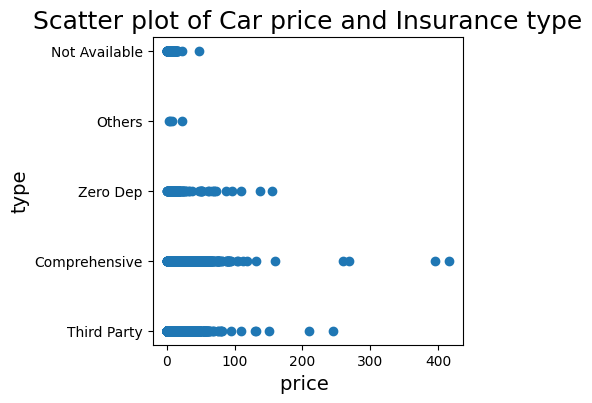

In [21]:
# Analyse categoricals cols 
# here we set the figure size to 15x15
plt.figure(figsize=(4, 4))
# plot two values price per type
#sns.stripplot(data = df, x='price', y='main_type', jitter=.1)
plt.scatter(df1.Car_price, df1['Insurance_type'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("type", fontsize=14)
plt.title("Scatter plot of Car price and Insurance type",fontsize=18)
plt.show()

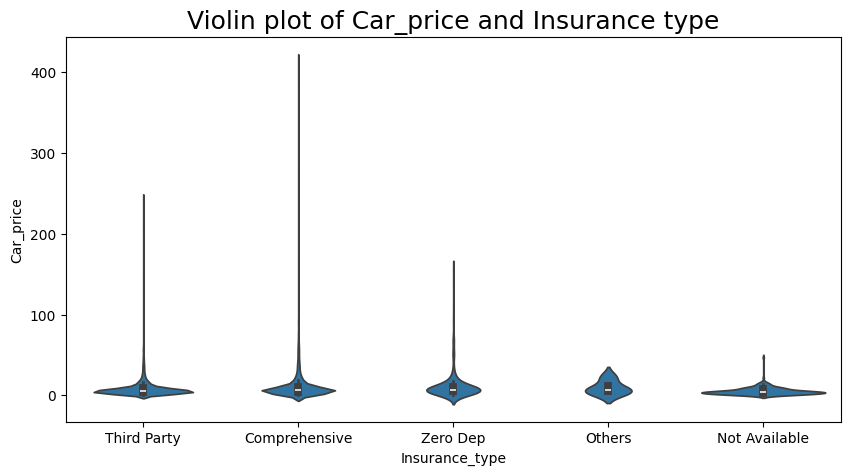

In [22]:
import seaborn as sns
import matplotlib
f, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data = df1, x='Insurance_type', y='Car_price')
plt.title("Violin plot of Car_price and Insurance type",fontsize=18)
plt.show()

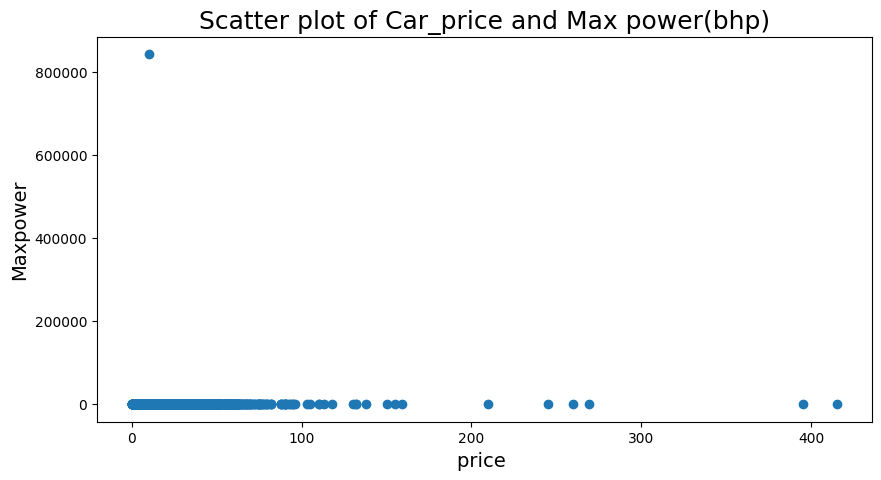

In [23]:
# here we set the figure size to 15x10
plt.figure(figsize=(10, 5))
# plot two values price per horsepower
plt.scatter(df1.Car_price, df['Max_power'])
#sns.stripplot(data = df, x='price', y='horsepower', jitter=.5)
plt.xlabel("price ", fontsize=14)
plt.ylabel("Maxpower", fontsize=14)
plt.title("Scatter plot of Car_price and Max power(bhp)",fontsize=18)
plt.show()

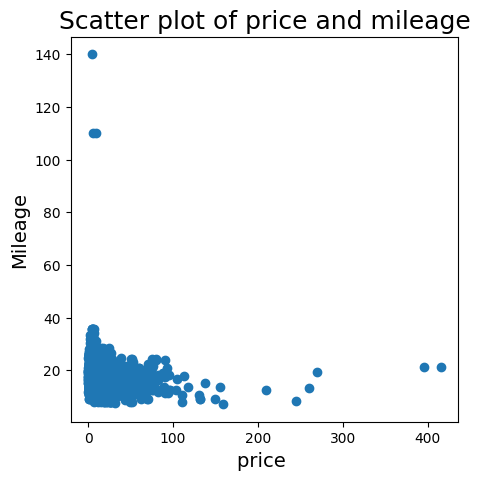

In [24]:
# here we set the figure size to 15x8
plt.figure(figsize=(5, 5))
# plot two values price per mileage
plt.scatter(df1.Car_price, df1['Mileage'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("Mileage", fontsize=14)
plt.title("Scatter plot of price and mileage",fontsize=18)
plt.show()

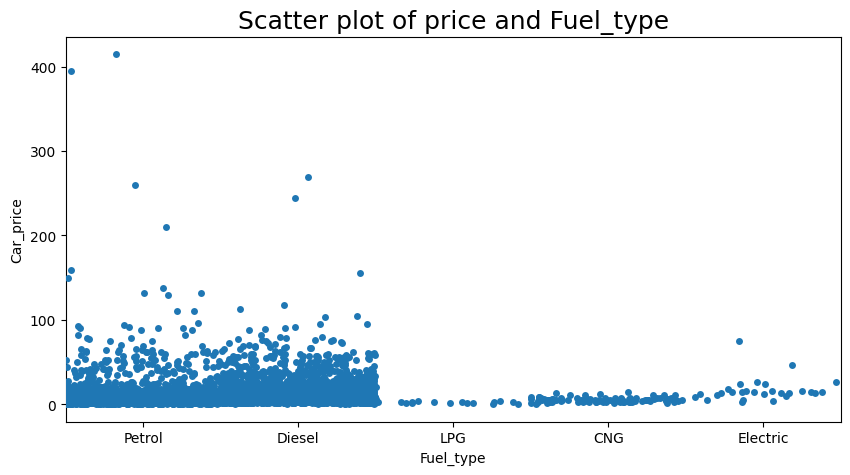

In [25]:
f, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(data = df1, x='Fuel_type', y='Car_price', jitter=.5)
plt.title("Scatter plot of price and Fuel_type",fontsize=18)
plt.show()

count    8360.000000
mean        9.554279
std        14.112757
min         0.200000
25%         3.990000
50%         6.010000
75%         9.500000
max       415.000000
Name: Car_price, dtype: float64


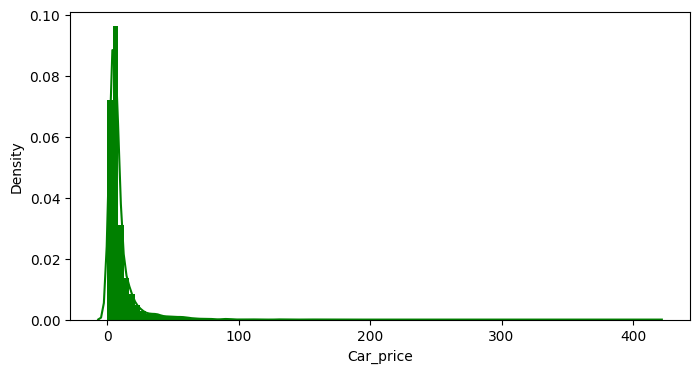

In [28]:
# Car price distribution
print(df1['Car_price'].describe())
plt.figure(figsize=(8, 4))
plt.title("Car price distribution",fontsize=18)
sns.distplot(df1['Car_price'], color='g', bins=100, hist_kws={'alpha':1});

In [29]:
df1.dtypes

Car_type             object
Kms_driven            int64
No_of_owners          int64
Car_price           float64
Fuel_type            object
Insurance_type       object
Transmission         object
Mileage             float64
Engine                int64
Max_power           float64
Seating_capacity      int64
Vehicle_age           int64
dtype: object

In [30]:
df1_numeric = df1.select_dtypes(include = ['float64', 'int64'])

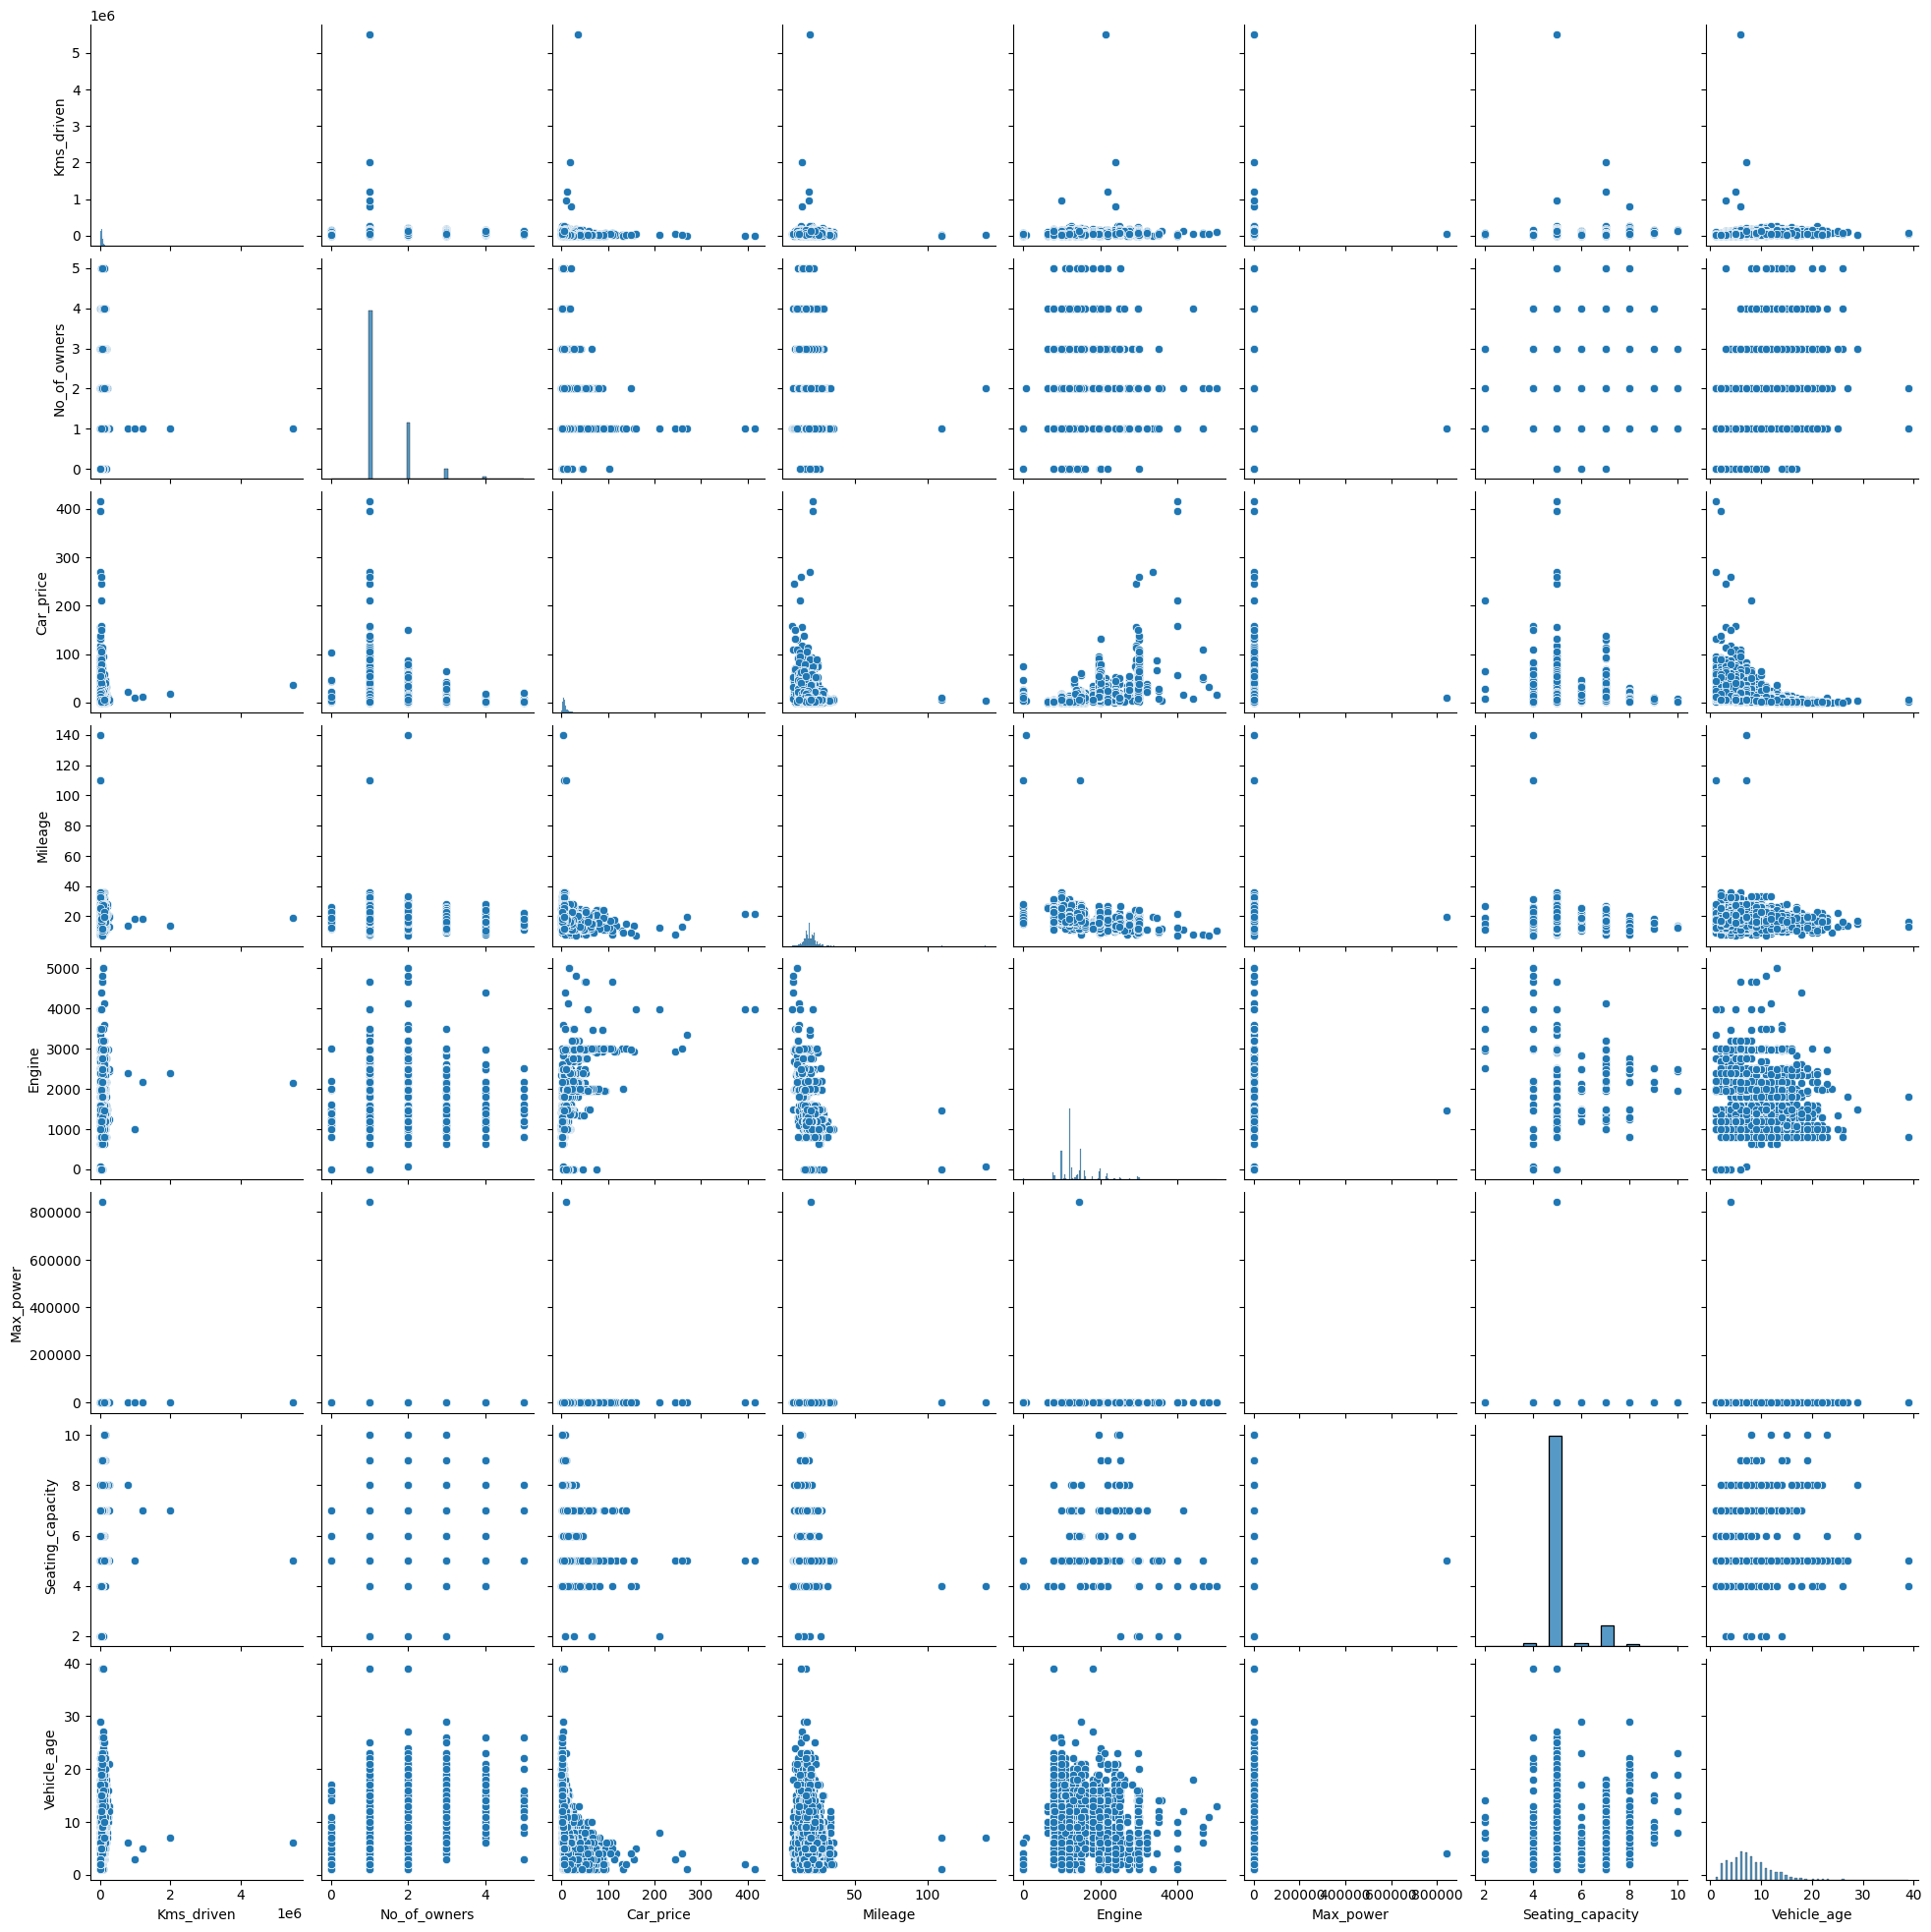

In [31]:
# Analyzing numerical variables
sns.pairplot(df1_numeric)
plt.show()

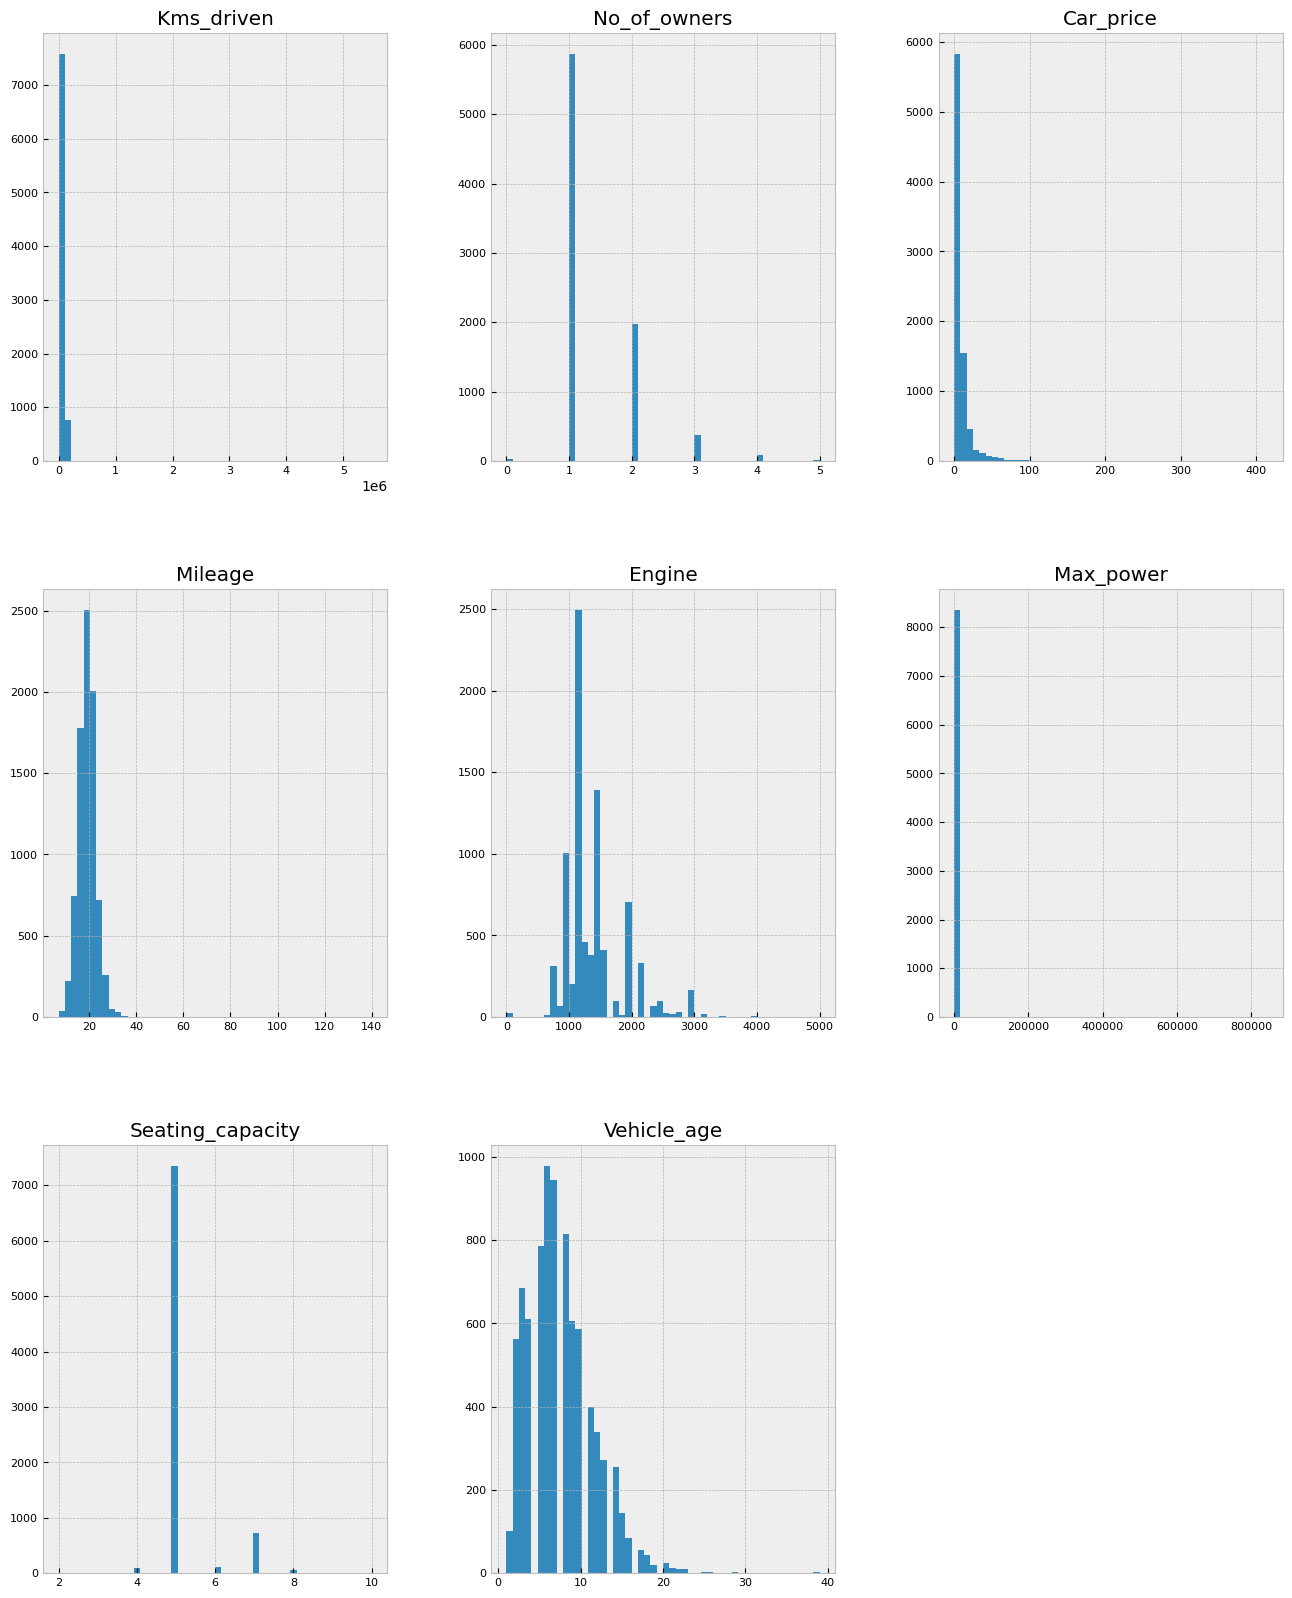

In [29]:
%matplotlib inline

plt.style.use('bmh')
df1_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informati

The problem is to build a model that will predict used car prices with a high degree of predictive accuracy given the available data. Let's see what is the actual correlation between price and the other data points. We will look at this in heatman for visualization.

<Axes: >

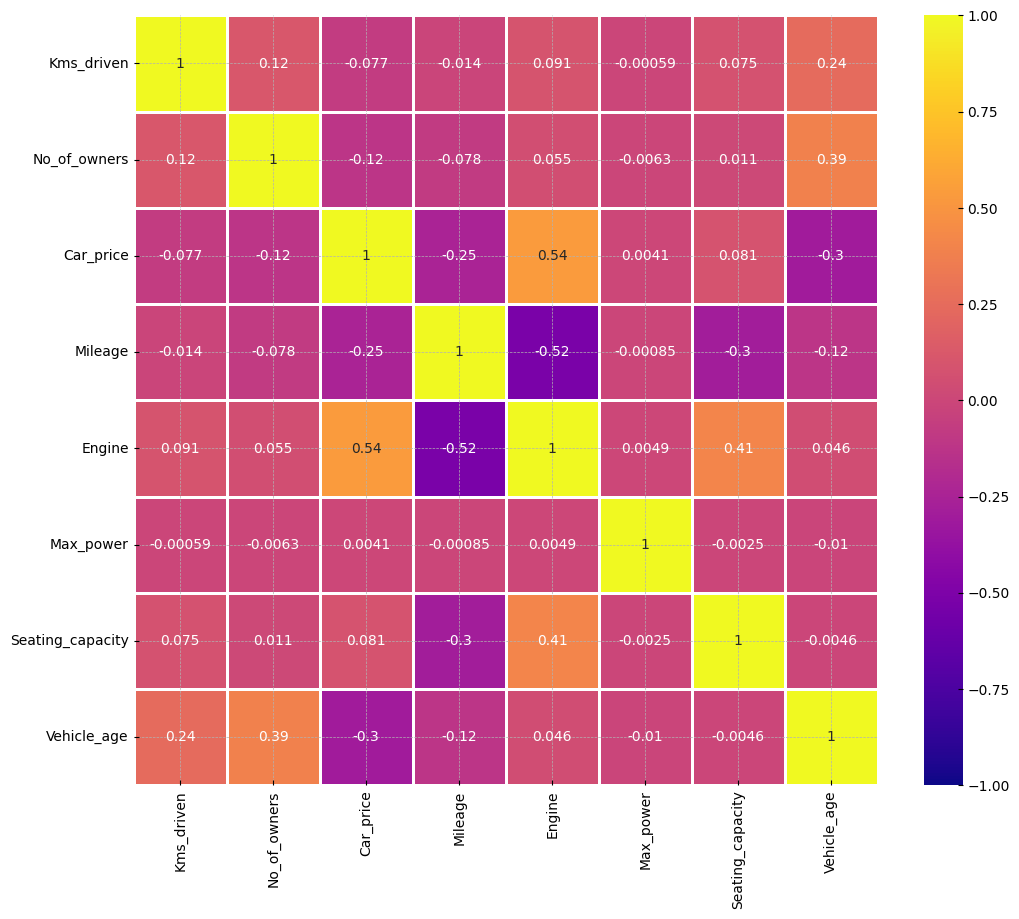

In [30]:
# Generate a custom diverging colormap
plt.figure(figsize=(12,10))
sns.heatmap(data = df1_numeric.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

In [31]:
# Feature selection
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8360 entries, 0 to 8368
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_type          8360 non-null   object 
 1   Kms_driven        8360 non-null   int64  
 2   No_of_owners      8360 non-null   int64  
 3   Car_price         8360 non-null   float64
 4   Fuel_type         8360 non-null   object 
 5   Insurance_type    8360 non-null   object 
 6   Transmission      8360 non-null   object 
 7   Mileage           8360 non-null   float64
 8   Engine            8360 non-null   int64  
 9   Max_power         8360 non-null   float64
 10  Seating_capacity  8360 non-null   int64  
 11  Vehicle_age       8360 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 849.1+ KB


In [32]:
df1.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_price', 'Fuel_type',
       'Insurance_type', 'Transmission', 'Mileage', 'Engine', 'Max_power',
       'Seating_capacity', 'Vehicle_age'],
      dtype='object')

In [34]:
df1["Car_price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
Car_price,0.2,9.554279,6.01,415.0,14.112757,10.066023


In [35]:
df1.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_price', 'Fuel_type',
       'Insurance_type', 'Transmission', 'Mileage', 'Engine', 'Max_power',
       'Seating_capacity', 'Vehicle_age'],
      dtype='object')

In [36]:
numerical_cols=[ 'Kms_driven', 'No_of_owners', 'Car_price', 'Mileage', 'Engine', 'Max_power','Vehicle_age','Seating_capacity']
categorical_cols=['Car_type','Fuel_type','Insurance_type','Transmission',]

In [37]:
df1

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,120000,3,4.00,Petrol,Third Party,Manual,23.10,998,67.04,5,9
1,SUV,32706,2,8.11,Petrol,Comprehensive,Manual,17.00,1497,121.31,5,6
2,Hatchback,11949,1,5.85,Petrol,Comprehensive,Manual,23.84,1199,84.00,5,6
3,Sedan,17794,1,4.62,Petrol,Comprehensive,Manual,19.10,1197,81.86,5,10
4,SUV,60000,1,7.90,Diesel,Third Party,Manual,23.65,1248,88.50,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,10000,1,5.10,Petrol,Third Party,Manual,25.24,998,65.71,5,2
8365,Hatchback,120000,1,1.80,Petrol,Third Party,Manual,22.74,796,47.30,5,10
8366,Sedan,50000,3,5.50,Petrol,Third Party,Automatic,11.74,1796,186.00,5,13
8367,Hatchback,40000,1,1.40,Petrol,Third Party,Manual,18.50,1197,85.80,5,12


Encoding Categorical variables

In [38]:
# One-Hot Encoding for conversion of categorical variables to numeric values
df1 = pd.get_dummies(data=df1,columns=['Car_type','Fuel_type','Insurance_type','Transmission'],dtype='int') #change qualitative data to bboolean data (quantitativ)
df1.head()

,Kms_driven,No_of_owners,Car_price,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age,Car_type_Convertibles,Car_type_Coupe,...,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Insurance_type_Comprehensive,Insurance_type_Not Available,Insurance_type_Others,Insurance_type_Third Party,Insurance_type_Zero Dep,Transmission_Automatic,Transmission_Manual
0,120000,3,4.00,23.10,998,67.04,5,9,0,0,...,0,0,1,0,0,0,1,0,0,1
1,32706,2,8.11,17.00,1497,121.31,5,6,0,0,...,0,0,1,1,0,0,0,0,0,1
2,11949,1,5.85,23.84,1199,84.00,5,6,0,0,...,0,0,1,1,0,0,0,0,0,1
3,17794,1,4.62,19.10,1197,81.86,5,10,0,0,...,0,0,1,1,0,0,0,0,0,1
4,60000,1,7.90,23.65,1248,88.50,5,9,0,0,...,0,0,0,0,0,0,1,0,0,1


In [39]:
df1.columns

Index(['Kms_driven', 'No_of_owners', 'Car_price', 'Mileage', 'Engine',
       'Max_power', 'Seating_capacity', 'Vehicle_age', 'Car_type_Convertibles',
       'Car_type_Coupe', 'Car_type_Hatchback', 'Car_type_Hybrids',
       'Car_type_MUV', 'Car_type_Minivans', 'Car_type_Pickup Trucks',
       'Car_type_SUV', 'Car_type_Sedan', 'Car_type_Wagon', 'Fuel_type_CNG',
       'Fuel_type_Diesel', 'Fuel_type_Electric', 'Fuel_type_LPG',
       'Fuel_type_Petrol', 'Insurance_type_Comprehensive',
       'Insurance_type_Not Available', 'Insurance_type_Others',
       'Insurance_type_Third Party', 'Insurance_type_Zero Dep',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [40]:
df1.head()

,Kms_driven,No_of_owners,Car_price,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age,Car_type_Convertibles,Car_type_Coupe,...,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Insurance_type_Comprehensive,Insurance_type_Not Available,Insurance_type_Others,Insurance_type_Third Party,Insurance_type_Zero Dep,Transmission_Automatic,Transmission_Manual
0,120000,3,4.00,23.10,998,67.04,5,9,0,0,...,0,0,1,0,0,0,1,0,0,1
1,32706,2,8.11,17.00,1497,121.31,5,6,0,0,...,0,0,1,1,0,0,0,0,0,1
2,11949,1,5.85,23.84,1199,84.00,5,6,0,0,...,0,0,1,1,0,0,0,0,0,1
3,17794,1,4.62,19.10,1197,81.86,5,10,0,0,...,0,0,1,1,0,0,0,0,0,1
4,60000,1,7.90,23.65,1248,88.50,5,9,0,0,...,0,0,0,0,0,0,1,0,0,1


In [41]:
df1['Car_price'].head()

0    4.00
1    8.11
2    5.85
3    4.62
4    7.90
Name: Car_price, dtype: float64

Statistical summary  to understand the distribution of data

In [42]:
df1["Car_price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
Car_price,0.2,9.554279,6.01,415.0,14.112757,10.066023


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8360 entries, 0 to 8368
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kms_driven                    8360 non-null   int64  
 1   No_of_owners                  8360 non-null   int64  
 2   Car_price                     8360 non-null   float64
 3   Mileage                       8360 non-null   float64
 4   Engine                        8360 non-null   int64  
 5   Max_power                     8360 non-null   float64
 6   Seating_capacity              8360 non-null   int64  
 7   Vehicle_age                   8360 non-null   int64  
 8   Car_type_Convertibles         8360 non-null   int64  
 9   Car_type_Coupe                8360 non-null   int64  
 10  Car_type_Hatchback            8360 non-null   int64  
 11  Car_type_Hybrids              8360 non-null   int64  
 12  Car_type_MUV                  8360 non-null   int64  
 13  Car_type

In [44]:
df1.dropna(inplace=True)
df1.shape

(8360, 30)

In [45]:
# Rearranged column for ease
first_column=df1.pop('Car_price')
df1.insert(0,'Car_price',first_column)
df1.head()

,Car_price,Kms_driven,No_of_owners,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age,Car_type_Convertibles,Car_type_Coupe,...,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Insurance_type_Comprehensive,Insurance_type_Not Available,Insurance_type_Others,Insurance_type_Third Party,Insurance_type_Zero Dep,Transmission_Automatic,Transmission_Manual
0,4.00,120000,3,23.10,998,67.04,5,9,0,0,...,0,0,1,0,0,0,1,0,0,1
1,8.11,32706,2,17.00,1497,121.31,5,6,0,0,...,0,0,1,1,0,0,0,0,0,1
2,5.85,11949,1,23.84,1199,84.00,5,6,0,0,...,0,0,1,1,0,0,0,0,0,1
3,4.62,17794,1,19.10,1197,81.86,5,10,0,0,...,0,0,1,1,0,0,0,0,0,1
4,7.90,60000,1,23.65,1248,88.50,5,9,0,0,...,0,0,0,0,0,0,1,0,0,1


Model Development 

In [46]:
# Splitting data into feature and target variables
X = df1.iloc[:, 1:]            # Feature matrix (independent variables)
y = df1.iloc[:, 0]             # Target variable (dependent variable)

In [47]:
X.head()

,Kms_driven,No_of_owners,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age,Car_type_Convertibles,Car_type_Coupe,Car_type_Hatchback,...,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Insurance_type_Comprehensive,Insurance_type_Not Available,Insurance_type_Others,Insurance_type_Third Party,Insurance_type_Zero Dep,Transmission_Automatic,Transmission_Manual
0,120000,3,23.10,998,67.04,5,9,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,32706,2,17.00,1497,121.31,5,6,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,11949,1,23.84,1199,84.00,5,6,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,17794,1,19.10,1197,81.86,5,10,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,60000,1,23.65,1248,88.50,5,9,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
y.head()

0    4.00
1    8.11
2    5.85
3    4.62
4    7.90
Name: Car_price, dtype: float64

In [49]:
# To check important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [50]:
print(model.feature_importances_)

[3.52774240e-02 9.16295931e-03 2.84134180e-02 1.18646368e-01
 4.16946183e-01 9.58026826e-03 1.23804722e-01 3.25506732e-04
 2.68440296e-03 1.48042715e-02 3.68515250e-04 3.74391723e-03
 1.35358673e-05 4.06065239e-05 3.47353490e-02 7.82905132e-03
 1.54277927e-06 3.93295945e-05 1.26692865e-02 6.48460103e-04
 1.21251940e-06 6.64173169e-03 5.96185608e-03 2.77825087e-04
 6.99517209e-06 3.54366537e-03 3.30140961e-03 3.36052536e-03
 1.57169662e-01]


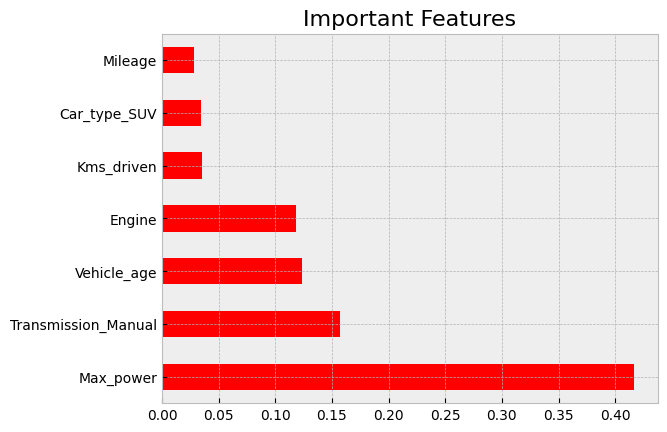

In [51]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

Model Building 

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [54]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,61.869675,7.865728,0.510523,0.508534
Support Vector Rregression,126.913166,11.265574,0.061647,-0.008143
Decision Tree Regressor,22.850168,4.780185,0.818710,0.818488
Random Forest Regressor,12.553255,3.543057,0.900753,0.900282
Ridge,61.374117,7.834163,0.514495,0.512471


I have seen that Random Forest Regressor have minimum 'RMSE' and high accuracy. So, I decided to use Random Forest Regressor as Machine Learning Model.

Model Selection

In [55]:
regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [56]:
# Create the random grid
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [57]:
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1)
regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
y_predictions = regressor_random.predict(X_test)
y_predictions

array([3.56993346, 3.82192341, 6.03576133, ..., 5.91773   , 4.85397103,
       5.21506057])

Predicting Test Data by visualizing

Now that I've fit and trained the model, I need to evaluate its performance by predicting the test values and visualize the results.

Text(0.5, 1.0, 'True value Vs Predicted values of Car Price')

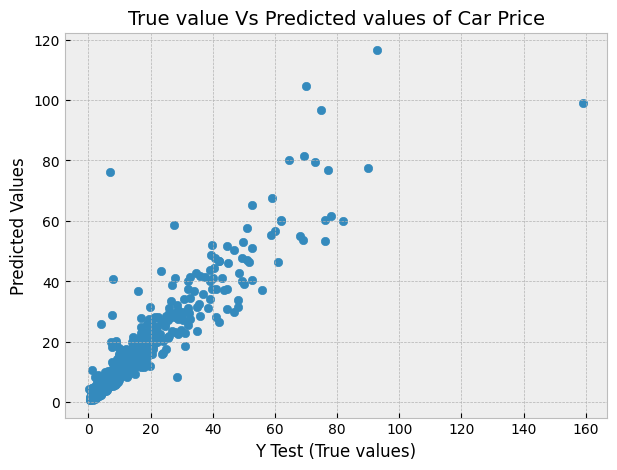

In [59]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Car Price', fontsize=14)

Residuals

Next, I explore the residuals to make sure the data  is Normally distributed.

<Axes: xlabel='Car_price', ylabel='Density'>

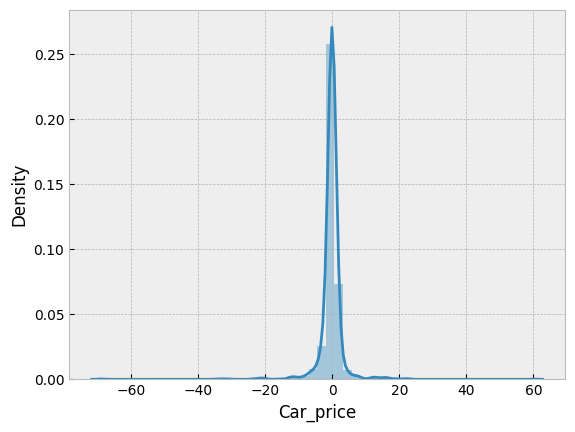

In [60]:
sns.distplot(y_test - y_predictions)

Model Evaluation

In [61]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))

Mean Absolute Error:  1.5901652555307555
Mean Squareed Error:  15.843594524196432
Root Mean Square Error:  3.98040130190367

Explaned Variance Score:  0.8747525984383568


In [62]:
print('Accuracy: ', r2_score(y_test, y_predictions))

Accuracy:  0.8741453499853269


Generate the pickle file

In [63]:
import pickle

# open the file where you want to store
# file = open('rf_regression_model10.pkl', 'wb')
with open('model11.pkl', 'wb') as f:
    pickle.dump(regressor_random, f)   